In [1]:
from bs4 import BeautifulSoup

In [2]:
html = """
<html>
<head><title> test site </title></head>
<p class='class1' align="left">test3</p>
<p class='class1'>test2</p>
<p id='p1'>오늘의 주가지수 1500</p>
<span class='class3'>span tag text</span>
<p class='class4'>test3</p>
</html>
"""

In [3]:
soup = BeautifulSoup(html, 'lxml')
list(soup.children)

[<html>
 <head><title> test site </title></head>
 <body><p align="left" class="class1">test3</p>
 <p class="class1">test2</p>
 <p id="p1">오늘의 주가지수 1500</p>
 <span class="class3">span tag text</span>
 <p class="class4">test3</p>
 </body></html>,
 '\n']

In [4]:
list(soup.body.children)

[<p align="left" class="class1">test3</p>,
 '\n',
 <p class="class1">test2</p>,
 '\n',
 <p id="p1">오늘의 주가지수 1500</p>,
 '\n',
 <span class="class3">span tag text</span>,
 '\n',
 <p class="class4">test3</p>,
 '\n']

In [10]:
# url = 'https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after'
basic_url = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page="
# 2page 
# 3page

In [12]:
from urllib.request import urlopen
url1 = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page=1"
page = urlopen(url1)
soup = BeautifulSoup(page, "html.parser")
comment_all = soup.find_all('td', class_='title')
comment_all

[<td class="title">
 <a class="movie color_b" href="/movie/bi/mi/basic.nhn?code=171725">스파이더맨: 뉴 유니버스</a>
 <div class="list_netizen_score">
 <span class="st_off"><span class="st_on" style="width:60%">별점 - 총 10점 중</span></span><em>6</em>
 </div>
 <br/>곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ 
 			
 			
 			
 				
 				
 				
 				<a class="report" href="#" onclick="report('chac****', 'E5Z+jy9CMsG7VuZiNFuC+yJKc3bj7S9GzP6q/Ytc9pc=', '곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ', '17551922', 'point_after');" style="color:#8F8F8F" title="새 창">신고</a>
 </td>,
 <td class="title">
 <a class="movie color_b" href="/movie/bi/mi/basic.nhn?code=171725">스파이더맨: 뉴 유니버스</a>
 <div class="list_netizen_score">
 <span class="st_off"><span class="st_on" style="width:100%">별점 - 총 10점 중</span></span><em>10</em>
 </div>
 <br/>이게 예술이 아니면 뭔가요? 
 			
 			
 			
 				
 				
 				
 				<a class="report" href="#" onclick="report('froz****', 'MJPVcC7k/xVj6MR6bKQYS/ukHGqc+H+j5LIinwcPyxM=', '이게 예술이 아니면 뭔가요?', '17550850', 'point_after');" style="color:#8

In [25]:
list(comment_all[9].children)

['\n',
 <a class="movie color_b" href="/movie/bi/mi/basic.nhn?code=171725">스파이더맨: 뉴 유니버스</a>,
 '\n',
 <div class="list_netizen_score">
 <span class="st_off"><span class="st_on" style="width:100%">별점 - 총 10점 중</span></span><em>10</em>
 </div>,
 '\n',
 <br/>,
 '이게 진짜 현대예술이지 \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t',
 <a class="report" href="#" onclick="report('aekq****', 'TKDLHGd6yXqm8uAyZTp2W7FNVGZUc8XcLVQXLRk0+pE=', '이게 진짜 현대예술이지', '17516944', 'point_after');" style="color:#8F8F8F" title="새 창">신고</a>,
 '\n']

In [26]:
print(len( comment_all ))

10


In [29]:
temp = list(comment_all[5].children)
temp[6]

'스파이더맨 판권을 소니가 가져야 하는 이유 \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t'

In [30]:
temp = list(comment_all[1].children)
result = temp[6].strip()
result

'이게 예술이 아니면 뭔가요?'

In [32]:
cnt = 0
comments = []
for comment in comment_all:
    temp= list(comment.children)
    if len(temp) < 5:
        cnt= cnt + 1
        continue
    else:
        try:
            cnt= cnt + 1
            result = temp[6].strip()
            comments.append(result)
        except:
            print("error cnt count", cnt)
comments

['곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ',
 '이게 예술이 아니면 뭔가요?',
 '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음',
 '명대사:헤이',
 '진짜 고퀄리티다....',
 '스파이더맨 판권을 소니가 가져야 하는 이유',
 '갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지?',
 '영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ',
 '영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !!',
 '이게 진짜 현대예술이지']

In [46]:
comments = [ ]
cnt = 0
for i in range(1,8):
    url = basic_url + str(i)
    page = urlopen(url)
    soup = BeautifulSoup(page, "html.parser")
    
    comment_all = soup.find_all('td', class_='title')
    for comment in comment_all:
        temp= list(comment.children)
        if len(temp) < 5:
            cnt= cnt + 1
            print("len<5 case :",cnt)
            continue
        else:
            try:
                cnt= cnt + 1
                result = temp[6].strip()
                comments.append(result)
            except:
                cnt= cnt + 1
                print("len>=5 case ",cnt)
                print(temp)
print(len(comments))
print(comments)
print(cnt)

70
['곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ', '이게 예술이 아니면 뭔가요?', '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음', '명대사:헤이', '진짜 고퀄리티다....', '스파이더맨 판권을 소니가 가져야 하는 이유', '갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지?', '영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ', '영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !!', '이게 진짜 현대예술이지', '스파이더맨 작품들 중에 최고.', '스파이더맨 뉴 유니버스.', '영화의 색감이 너무 좋다 눈이 즐거운 영화!', '', '애니메이션 자체로도 훌륭하지만, 전달하려는 메세지와 전달하는 방식도 매우 뛰어나다.', '마블에서 만든 실사판보다 더 괜찮음 스파이더맨 특유의 설정때문에 애니메이션이 더 잘 맞는듯', '존잼 3번이나 봄 ♡♡♡♡', '꼭보셈 어벤져스보다 재밌음', '진짜 잘 만들었음. 영상미가 좋음.', '내가 스파이더맨 좋아하고 좀 안다 하시는분들은 더 재밋게 볼거같아요ㅋㅋㅋ 너무 재밌었음', '생각한거 보대는 재밌다킬링타임용으로는 훌륭함', '전반적으로 좋으나 후반부가 너무 일본스러운 아기자기한 판타지 세계가 나와 고개를 돌리게 된다.', '원작 코믹스를 그대로 옮겨놓은 듯한 영상,연출이 너무 신선하고 재미있었다.꼭 보시길 추천한다.', '득특하고 창의적인 완벽한 스파이더맨 영화!', '', '개인적으루 ost ㄹㅇ 미쳤음. 넘 좋당.', '그냥 미쳤음 모든게 새롭다', '애니메이션으로는 볼만 했음. 다만 실사 유니버스와는 별도로 계속 나왔으면 한다.', '스파이더맨으로 더 이상 뽑아 낼게 있나 싶었는데, 깜놀했음ㅎ 진짜 잘 만들었다. 신선해~~!',

In [47]:
import pandas as pd

In [48]:
dict_doc = {"text" : comments}
doc = pd.DataFrame(dict_doc)

In [49]:
doc.to_csv("스파이더맨리뷰.csv", index = False)

In [50]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [51]:
f = open("스파이더맨리뷰.csv", encoding="utf-8")
#f = open("SpiderMan.txt", 'r', encoding='utf-8')
text = f.read()
f.close()

In [52]:
from matplotlib import rc
rc('font', family='NanumGothic')

(-0.5, 399.5, 199.5, -0.5)

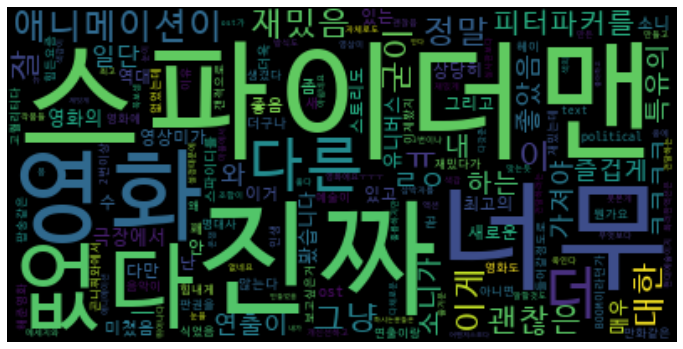

In [54]:
wcloud = WordCloud('./data/D2Coding.ttf', max_words=1000, relative_scaling = 0.2).generate(text)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')

### 네이버 영화 정보 가져오기

In [65]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [66]:
url="https://movie.naver.com/movie/running/current.nhn"
page=urlopen(url)
soup=BeautifulSoup(page,'lxml')

## 01.제목가져오기

In [90]:
move_list = soup.find_all("dt", class_="tit")
move_list[2].find("a").text
print(move_list)

[<dt class="tit">
<span class="ico_rating_12">12세 관람가</span>
<a href="/movie/bi/mi/basic.nhn?code=187322">크루엘라</a>
<!-- N=a:nol.title,r:1,i:187322 -->
</dt>, <dt class="tit">
<span class="ico_rating_15">15세 관람가</span>
<a href="/movie/bi/mi/basic.nhn?code=189368">콰이어트 플레이스 2</a>
<!-- N=a:nol.title,r:2,i:189368 -->
</dt>, <dt class="tit">
<span class="ico_rating_all">전체 관람가</span>
<a href="/movie/bi/mi/basic.nhn?code=202903">루카</a>
<!-- N=a:nol.title,r:3,i:202903 -->
</dt>, <dt class="tit">
<span class="ico_rating_15">15세 관람가</span>
<a href="/movie/bi/mi/basic.nhn?code=196051">극장판 귀멸의 칼날: 무한열차편</a>
<!-- N=a:nol.title,r:4,i:196051 -->
</dt>, <dt class="tit">
<span class="ico_rating_15">15세 관람가</span>
<a href="/movie/bi/mi/basic.nhn?code=187849">여고괴담 여섯번째 이야기 : 모교</a>
<!-- N=a:nol.title,r:5,i:187849 -->
</dt>, <dt class="tit">
<span class="ico_rating_15">15세 관람가</span>
<a href="/movie/bi/mi/basic.nhn?code=190726">컨저링 3: 악마가 시켰다</a>
<!-- N=a:nol.title,r:6,i:190726 -->
</dt>, <dt class="tit"

In [83]:
movie_title=[]
for one in move_list:
    one_movie=one.find("a").text
    movie_title.append(one_movie)
movie_title

['크루엘라',
 '콰이어트 플레이스 2',
 '루카',
 '극장판 귀멸의 칼날: 무한열차편',
 '여고괴담 여섯번째 이야기 : 모교',
 '컨저링 3: 악마가 시켰다',
 '캐시트럭',
 '분노의 질주: 더 얼티메이트',
 '뱅드림! 로젤리아 에피소드Ⅰ: 약속',
 '파이프라인',
 '아야와 마녀',
 '클라이밍',
 '그 여름, 가장 차가웠던',
 '그레타 툰베리',
 '야구소녀',
 '노매드랜드',
 '프로페서 앤 매드맨',
 '혼자 사는 사람들',
 '애플',
 '500일의 썸머',
 '낫아웃',
 '썰',
 '굴뚝마을의 푸펠',
 '까치발',
 '인트로덕션',
 '레이니 데이 인 뉴욕',
 '더 파더',
 '#위왓치유',
 '포겟 미 낫-엄마에게 쓰는 편지',
 '중경삼림',
 '사랑하고 사랑받고 차고 차이고',
 '크루즈 패밀리: 뉴 에이지',
 '극장판 콩순이: 장난감나라 대모험',
 '학교 가는 길',
 '너의 이름은.',
 '라이더스 오브 저스티스',
 '청춘 선거',
 '미나리',
 '화양연화',
 '강변호텔',
 '화이트 온 화이트',
 '폭력의 그림자',
 '쿠사마 야요이: 무한의 세계',
 '도라에몽: 스탠바이미 2',
 '토토리! 우리 둘만의 여름',
 '명탐정 코난: 비색의 탄환',
 '내겐 너무 소중한 너',
 '강호아녀',
 '플래시백',
 '빅 피쉬',
 '마세티 킬즈',
 '실크 로드',
 '분노의 질주',
 '미스피츠',
 '스쿨 오브 락(樂)',
 '부활: 그 증거',
 '분노',
 '비커밍 아스트리드',
 '쿠오바디스, 아이다',
 '흐린 하늘에 웃다',
 '그을린 사랑',
 '노 게임 노 라이프 -제로-',
 '봉쇄수도원 카르투시오',
 '블루 재스민',
 '서칭 포 슈가맨',
 '소리에 놀라지 않는 사자처럼',
 '아들의 이름으로',
 '어른들은 몰라요',
 '억남',
 '가을 햇살',
 '간츠: 오',
 '구름의 저편, 약속의 장소',
 '그 여름 가장 조용한 바다',
 '그리고 삶은 계속된다',
 '꽁치의 맛',


In [129]:
movie_score = soup.find_all("span", class_="num")
movie_point = [i.string for i in soup.find_all('span', 'num')]
movie_point

['9.33',
 '19.7',
 '8.63',
 '15.92',
 '8.90',
 '15.26',
 '9.29',
 '7.52',
 '6.38',
 '6.59',
 '6.73',
 '6.54',
 '8.21',
 '5.61',
 '7.65',
 '3.14',
 '8.52',
 '1.89',
 '7.11',
 '1.62',
 '7.38',
 '1.45',
 '7.36',
 '1.37',
 '10.00',
 '0.88',
 '7.75',
 '0.81',
 '8.13',
 '0.56',
 '8.48',
 '0.47',
 '8.99',
 '0.42',
 '8.78',
 '0.37',
 '7.85',
 '0.27',
 '8.43',
 '0.22',
 '8.75',
 '0.22',
 '6.79',
 '0.22',
 '9.05',
 '0.22',
 '8.86',
 '0.2',
 '8.11',
 '0.2',
 '5.63',
 '0.2',
 '8.91',
 '0.17',
 '9.05',
 '0.15',
 '9.25',
 '0.12',
 '8.93',
 '0.12',
 '8.41',
 '0.1',
 '9.03',
 '0.1',
 '8.94',
 '0.1',
 '9.59',
 '0.1',
 '8.79',
 '0.1',
 '7.68',
 '0.1',
 '10.00',
 '0.1',
 '7.67',
 '0.07',
 '8.77',
 '0.07',
 '5.98',
 '0.05',
 '7.50',
 '0.05',
 '0.00',
 '0.05',
 '9.24',
 '0.05',
 '9.01',
 '0.05',
 '8.37',
 '0.05',
 '8.93',
 '0.05',
 '9.04',
 '0.02',
 '6.39',
 '0.02',
 '6.00',
 '0.02',
 '9.02',
 '0.02',
 '6.80',
 '0.01',
 '8.06',
 '0.01',
 '8.27',
 '0.01',
 '3.58',
 '0.01',
 '8.36',
 '0.01',
 '9.30',
 '0.01'

In [128]:
num = soup.find("span",class_="num2")
print(num.get_text())
print(len(num))

참여 4,582명
3


In [140]:
soup1=soup.find_all('span',class_='num2')
print(soup1)

[<span class="num2">참여 <em>4,582</em>명</span>, <span class="num2">참여 <em>315</em>명</span>, <span class="num2">참여 <em>20</em>명</span>, <span class="num2">참여 <em>12,374</em>명</span>, <span class="num2">참여 <em>40</em>명</span>, <span class="num2">참여 <em>1,758</em>명</span>, <span class="num2">참여 <em>546</em>명</span>, <span class="num2">참여 <em>5,405</em>명</span>, <span class="num2">참여 <em>46</em>명</span>, <span class="num2">참여 <em>1,324</em>명</span>, <span class="num2">참여 <em>134</em>명</span>, <span class="num2">참여 <em>14</em>명</span>, <span class="num2">참여 <em>5</em>명</span>, <span class="num2">참여 <em>4</em>명</span>, <span class="num2">참여 <em>905</em>명</span>, <span class="num2">참여 <em>567</em>명</span>, <span class="num2">참여 <em>87</em>명</span>, <span class="num2">참여 <em>154</em>명</span>, <span class="num2">참여 <em>47</em>명</span>, <span class="num2">참여 <em>4,502</em>명</span>, <span class="num2">참여 <em>132</em>명</span>, <span class="num2">참여 <em>53</em>명</span>, <span class="num2">참여 <em>113